In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu, lu_factor
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
# %matplotlib widget
# %matplotlib inline
# %matplotlib qt
%matplotlib notebook 

# Circles

### Finding a Circle tangent to 3 circles
In the figure below, trying to find the red cirle parameters can be thought of as imagining the center of the red circle as a point on a circle that is centered at $(a_i,b_i)$ with radius $r_i + r$. So the folowing three equations are satisfied.

$$  (a - a_1)^2 + (b - b_1)^2 = (r + r_1)^2 $$
$$  (a - a_2)^2 + (b - b_2)^2 = (r + r_2)^2 $$
$$  (a - a_3)^2 + (b - b_3)^2 = (r + r_3)^2 $$


![Circles_img](lib/Circles.png)



$$  a^2 - 2a \cdot a_1 + a_1^2 + b^2 - 2b \cdot b_1 + b_1^2 = r^2 + 2r \cdot r_1 + r_1^2 $$

$$  a^2 - 2a \cdot a_2 + a_2^2 + b^2 - 2b \cdot b_2 + b_2^2 = r^2 + 2r \cdot r_2 + r_2^2 $$

$$  a^2 - 2a \cdot a_3 + a_3^2 + b^2 - 2b \cdot b_3 + b_3^2 = r^2 + 2r \cdot r_3 + r_3^2 $$


Substract the equations,


$$ a \cdot (a_1-a_2)  + b \cdot (b_1-b_2)  + r \cdot (r_1-r_2) =  (-1/2) (r_1^2 - r_2^2 - a_1^2 + a_2^2 - b_1^2 + b_2^2)$$

$$ a \cdot (a_2-a_3)  + b \cdot (b_2-b_3)  + r \cdot (r_2-r_3) =  (-1/2) (r_2^2 - r_3^2 - a_2^2 + a_3^2 - b_2^2 + b_3^2)$$

$$ a \cdot (a_3-a_1)  + b \cdot (b_3-b_1)  + r \cdot (r_3-r_1) =  (-1/2) (r_3^2 - r_1^2 - a_3^2 + a_1^2 - b_3^2 + b_1^2)$$



$$ 
-2 \begin{bmatrix} a_1-a_2 & b_1-b_2 & r_1-r_2 \\ 
                   a_2-a_3 & b_2-b_3 & r_2-r_3 \\ 
                   a_3-a_1 & b_3-b_1 & r_3-r_1 \end{bmatrix}    
\begin{bmatrix} a \\ b \\ r \end{bmatrix} 
= \begin{bmatrix} r_1^2 - r_2^2 - a_1^2 + a_2^2 - b_1^2 + b_2^2 \\ 
                  r_2^2 - r_3^2 - a_2^2 + a_3^2 - b_2^2 + b_3^2 \\ 
                  r_3^2 - r_1^2 - a_3^2 + a_1^2 - b_3^2 + b_1^2 \end{bmatrix}$$

In [3]:
def circle(x, y, r):
    return [(x,y), r]

In [4]:
def matrix_fun(circle1, circle2, circle3):
    a1,b1 = circle1[0]
    a2,b2 = circle2[0]
    a3,b3 = circle3[0]
    
    r1 = circle1[1]
    r2 = circle2[1]
    r3 = circle3[1]
    
    
    s = np.array([[a1,b1,r1],[a2,b2,r2],[a3,b3,r3]])
    a = np.matmul([[1,-1,0],[0,1,-1],[-1,0,1]],s)
    
    if np.linalg.matrix_rank(a) < 2:
        print('A matrix has rank less than two')
        print('This means weird solutions')
    
#     print(a)
#     print(np.linalg.matrix_rank(a))
    
    b = np.array([[r1**2-r2**2-a1**2+a2**2-b1**2+b2**2],
                  [r2**2-r3**2-a2**2+a3**2-b2**2+b3**2],
                  [r3**2-r1**2-a3**2+a1**2-b3**2+b1**2]]) 
# print(b)
    
#     a12 = a1-a2
#     a23 = a2-a3
#     a31 = a3-a1
    
#     b12 = b1-b2
#     b23 = b2-b3
#     b31 = b3-b1
    
#     r12 = r1-r2
#     r23 = r2-r3
#     r31 = r3-r1
    
#     a = np.array([[a12,b12,r12],[a23,b23,r23],[a31,b31,r31]])



    
    
    return a,b

In [5]:
def solver(p,L,U,b):
#  LU = Pa  
# LUx = Pb

    
#     print(np.linalg.matrix_rank(L))
    
#     Ux = L^-1pb
    if np.linalg.matrix_rank(L) < 3:
        print('L matrix has rank less than three')
        
    b = np.matmul(p,b)
    b = np.matmul(np.linalg.inv(L),b)
    
#     print(U)
#     print(b)
    

    alpha = np.array(U[:2,:])
    beta  = np.array(b[:2,0])
    
#     print(beta)
    
    f = 1/alpha[0,0]
    g = 1/alpha[1,1]
    alpha[0,:] = f * alpha[0,:]
    beta[0] = f * beta[0]
    alpha[1,:] = g * alpha[1,:]
    beta[1] = g * beta[1]
    
    h = -alpha[0,1]
    
    alpha = np.matmul([[1,h],[0, 1]], alpha)
    beta = np.matmul([[1,h],[0, 1]], beta)  
    
#     print(alpha)
#     print(beta)
    
    alpha_r = np.array([-alpha[0,2], beta[0]])
    beta_r  = np.array([-alpha[1,2], beta[1]])
    
    print(alpha_r)
    print(beta_r)
    
    return alpha_r, beta_r
    

In [6]:
def quadratic_eq(a,b,c):
    return [-b+np.sqrt(b**2-4*a*c)/2*a, -b-np.sqrt(b**2-4*a*c)/2*a]

In [7]:
def solve2(circle1, alpha, beta):
    a1,b1 = circle1[0]
    r1 = circle1[1]
    
    c1 = alpha[0] + beta[0] - 1
    c2 = 2*(alpha[0]*(alpha[1]-a1) + beta[0]*(beta[1]-b1) - r1)
    c3 = (alpha[1]-a1)**2 + (beta[1]-b1)**2 - r1**2
    
    r = quadratic_eq(c1,c2,c3)
    
    r = max(r)
    
    a = alpha[0]*r + alpha[1]
    b = beta[0]*r + beta[1]
    
    return circle(a,b,r)

In [8]:
circle1 = circle(0,-.5, .5)
circle2 = circle(0,.5, .5)
circle3 = circle(0, 0, -1)
A,b = matrix_fun(circle1,circle2,circle3);
# print(np.linalg.matrix_rank(a))
# print(b)


P, L, U  =  lu(A) 

b = np.matmul(P,b)
b = np.matmul(np.linalg.inv(L),b)
# b = np.matmul(np.linalg.pinv(U),b)
print(U)
print(b)

# alpha,beta = solver(P,L,U,b)
# circ1 = solve2(circle1,alpha, beta)
# circ2 = solve2(circle2,alpha, beta)
# circ3 = solve2(circle3,alpha, beta)
# print(circ1)
# print(circ2)
# print(circ3)

[[ 0.  -1.   0. ]
 [ 0.   0.5  1.5]
 [ 0.   0.  -3. ]]
[[ 0.]
 [-1.]
 [ 2.]]


In [9]:
# fig, ax = plt.subplots(figsize=(6,6))

# ax.add_artist(plt.Circle(*circle1, alpha=0.7))
# ax.add_artist(plt.Circle(*circle2, alpha=0.7))
# ax.add_artist(plt.Circle(*circle3, alpha=0.7))
# ax.add_artist(plt.Circle(*circ, alpha=0.7))

# # print(circle4[0])
# # print(circle4[1])

# ax.set_ylim((-5,5))
# ax.set_xlim((-5,5))


# # plt.savefig("temp.png", bbox_inches="tight")


# plt.show()

In [10]:
#### 3 seed circles
circle1 = circle(12, 20, 60)
circle2 = circle(2, 11, 50)
circle3 = circle(99, 90, 121)
m,b= matrix_fun(circle1,circle2,circle3);
print(lu(m)[0])
print(lu(m)[1])
print(lu(m)[2])
# this means weird things (possibly infinite solutions)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.          0.          0.        ]
 [-0.89690722  1.          0.        ]
 [-0.10309278 -1.          1.        ]]
[[-9.70000000e+01 -7.90000000e+01 -7.10000000e+01]
 [ 0.00000000e+00 -8.55670103e-01 -2.68041237e+00]
 [ 0.00000000e+00  0.00000000e+00  4.62402167e-15]]


Notice, this is not the only configuration. We could have the red circle tangent on the inside of a blue cirle.

![Circles_img](lib/Circles2.png)

Notice that this just changes the Radius to act like a negative radius in the equations. So solving the above equations and changing th radius to negative should yield all the solutions

In [11]:
def quadratic_eq(a,b,c):
    return [-b+np.sqrt(b**2-4*a*c)/2*a, -b-np.sqrt(b**2-4*a*c)/2*a]

In [12]:
def circle(x, y, r):
    return [(x,y), r]

In [13]:
def beta(circle1, circle2, circle3):
    a1,b1 = circle1[0]
    a2,b2 = circle2[0]
    a3,b3 = circle3[0]
    
    r1 = circle1[1]
    r2 = circle2[1]
    r3 = circle3[1]
    
    a12 = a1-a2
    a23 = a2-a3
    b12 = b1-b2
    b23 = b2-b3
    r12 = r1-r2
    r23 = r2-r3
    
    if np.abs((b12*a23-a12*b23)) < 1E-8:
        print("error divide by 0, alpha ")
        print(r12*b23-b12*r23)
        if np.abs((r12*b23-b12*r23)) < 1E-8:
            return 0.0
        
    return (r12*a23-a12*r23)/(a12*b23-b12*a23)

In [14]:
def alpha(circle1, circle2, circle3):
    a1,b1 = circle1[0]
    a2,b2 = circle2[0]
    a3,b3 = circle3[0]
    
    r1 = circle1[1]
    r2 = circle2[1]
    r3 = circle3[1]
    
    a12 = a1-a2
    a23 = a2-a3
    b12 = b1-b2
    b23 = b2-b3
    r12 = r1-r2
    r23 = r2-r3
    
    
        
    if np.abs((b12*a23-a12*b23)) < 1E-8:
        print("error divide by 0, alpha ")
        print(r12*b23-b12*r23)
        if np.abs((r12*b23-b12*r23)) < 1E-8:
            return 0.0

    return (r12*b23-b12*r23)/(b12*a23-a12*b23)

In [15]:
def tangent_circle(circle1, circle2, circle3):
    a1,b1 = circle1[0]
    r1 = circle1[1]
    
    alpha_r = alpha(circle1, circle2, circle3)
    beta_r = beta(circle1, circle2, circle3)

    print(alpha_r)
    print(beta_r)
    
    a = alpha_r**2 + beta_r**2 - 1
    b = -2*(alpha_r*a1 + beta_r*b1 + r1)
    c = (a1**2 + b1**2 - r1**2)

    r = quadratic_eq(a,b,c)
    
    print(r)
    
    output = []
    for rad in r:
        x = alpha_r*rad
        y = beta_r*rad
        output.append(circle(x,y,rad))
    
    return output

In [16]:
# 3 seed circles
circle1 = circle(10,15,10)
circle2 = circle(90,-10,15)
circle3 = circle(50,2,14)
circle4 = tangent_circle(circle1,circle2,circle3)

0.875
3.0
[528.406079578237, -273.4060795782371]


## Plotting planes in matplotlib

In [17]:

# plane dot [x,y,z,1] = 0 determines if we are on the plane
def get_plane(plane = [1,2,3,4]):
    
    best = np.argmax(np.abs(plane[:3]))
#     best = 1
    if abs(plane[best]) < 1e-6:
        print('no good')
    
    bounds = np.linspace(-10,10,20)
    
    if best == 0:
        ys = bounds
        zs = bounds
        Y,Z = np.meshgrid(ys,zs)
        X = (-plane[1]*Y - plane[2]*Z + plane[3])/plane[0]
    elif best == 1:
        xs = bounds
        zs = bounds
        X,Z = np.meshgrid(xs,zs)
        Y = (-plane[0]*X - plane[2]*Z + plane[3])/plane[1]
    elif best == 2:
        xs = bounds
        ys = bounds
        X,Y = np.meshgrid(xs,ys)
        Z = (-plane[0]*X - plane[1]*Y + plane[3])/plane[2]

            
    
    return(X,Y,Z)


In [18]:
def intersect(plane1, plane2):
    direction = np.cross(plane1[:3],plane2[:3])
    i = np.argmax(np.abs(direction[:3]))
    
    if abs(direction[i]) < 1e-6:
        print(direction[:3], i)
        print("here")
        return
    
    intercept = np.zeros_like(direction)
    
    b = [plane1[3], plane2[3]]
    
    j = np.arange(3)
    
    A = np.array([plane1[:3][i != j], plane2[:3][i != j]])
    
    intercept[j[i != j]] = np.linalg.solve(A,b)  
    
    t = np.linspace(-5,5,10)
    
#     print(direction, t.shape)
    line = np.outer(direction, t) 
    
    print(direction)
    print(intercept)
    
    return line[0,:]+intercept[0], line[1,:]+intercept[1], line[2,:]+intercept[2] 

In [22]:
circle1 = circle(0,   0, -1)
circle2 = circle(0,  .5, .5)
circle3 = circle(0.666666666666666, -0.0, 0.3333333333333333)
A,b = matrix_fun(circle1,circle2,circle3)
print(A, '\n\n', b)



# A,b = matrix_fun(circle1,circle2,circle4)
print(np.linalg.matrix_rank(A))

[[ 0.         -0.5        -1.5       ]
 [-0.66666667  0.5         0.16666667]
 [ 0.66666667  0.          1.33333333]] 

 [[ 1.        ]
 [ 0.33333333]
 [-1.33333333]]
2


In [23]:
plane1 = np.append(A[0,:], b[0])
plane2 = np.append(A[1,:], b[1])
plane3 = np.append(A[2,:], b[2])

# print(plane1)
# print(plane2)
# print(plane3)

# intersect(plane1, plane2);
# intersect(plane2, plane3)
# intersect(plane3, plane1);

<IPython.core.display.Javascript object>


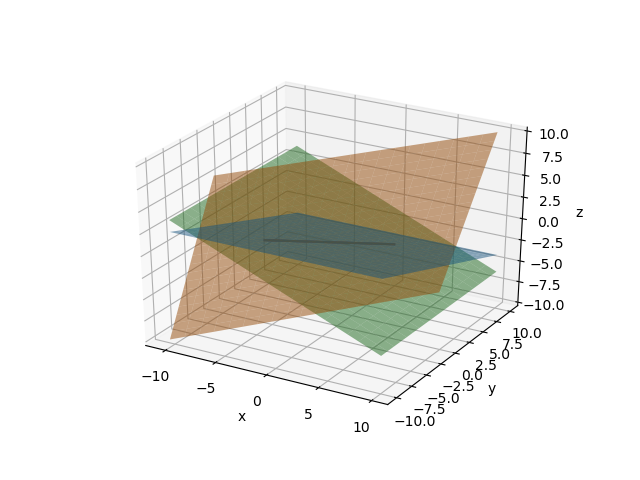

[[ 0.         -0.5        -1.5       ]
 [-0.66666667  0.5         0.16666667]
 [ 0.66666667  0.          1.33333333]] 

 [[ 1.        ]
 [ 0.33333333]
 [-1.33333333]]
[ 0.66666667  1.         -0.33333333]
[-0.66666667  0.         -0.66666667]
[ 0.66666667  1.         -0.33333333]
[-0.66666667  0.         -0.66666667]
[ 0.66666667  1.         -0.33333333]
[-0.66666667  0.         -0.66666667]


In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

circle1 = circle(0,   0, -1)
circle2 = circle(0,  .5, .5)
circle3 = circle(0.666666666666666, -0.0, 0.3333333333333333)

# circle1 = circle(0,   0, -1)
# circle2 = circle(0,  .5, .5)
# circle3 = circle(0, -.5, .5)

A,b = matrix_fun(circle1,circle2,circle3)
print(A, '\n\n', b)

plane1 = np.append(A[0,:], b[0])
plane2 = np.append(A[1,:], b[1])
plane3 = np.append(A[2,:], b[2])


ax.plot_surface(*get_plane(plane1), alpha=0.5)
ax.plot_surface(*get_plane(plane2), alpha=0.5)
ax.plot_surface(*get_plane(plane3), alpha=0.5);

ax.plot(*intersect(plane1, plane2))
ax.plot(*intersect(plane2, plane3))
ax.plot(*intersect(plane3, plane1));


# print(np.append(A[0,:], b[0]))
# plot_plane(np.append(A[0,:], b[0]))
# plot_plane(np.append(A[1,:], b[1]))

# plt.show();

In [144]:
# with the equation of a line

In [26]:
def matrix_fun(circle1, circle2, circle3):
    a1,b1 = circle1[0]
    a2,b2 = circle2[0]
    a3,b3 = circle3[0]
    
    r1 = circle1[1]
    r2 = circle2[1]
    r3 = circle3[1]
    
    
    s = np.array([[a1,b1,r1],[a2,b2,r2],[a3,b3,r3]])
    a = -2*np.matmul([[1,-1,0],[0,1,-1],[-1,0,1]],s)
    
    if np.linalg.matrix_rank(a) < 2:
        print('A matrix has rank less than two')
        print('This means weird solutions')
    
#     print(a)
#     print(np.linalg.matrix_rank(a))
    
    b = np.array([[r1**2-r2**2-a1**2+a2**2-b1**2+b2**2],
                  [r2**2-r3**2-a2**2+a3**2-b2**2+b3**2],
                  [r3**2-r1**2-a3**2+a1**2-b3**2+b1**2]]) 
# print(b)
    
#     a12 = a1-a2
#     a23 = a2-a3
#     a31 = a3-a1
    
#     b12 = b1-b2
#     b23 = b2-b3
#     b31 = b3-b1
    
#     r12 = r1-r2
#     r23 = r2-r3
#     r31 = r3-r1
    
#     a = np.array([[a12,b12,r12],[a23,b23,r23],[a31,b31,r31]])



    
    
    return a,b

In [27]:
def get_line(plane1, plane2):
    direction = np.cross(plane1[:3],plane2[:3])
    i = np.argmax(np.abs(direction[:3]))
    
    if abs(direction[i]) < 1e-6:
        print(direction[:3], i)
        print("here")
        return
    
    intercept = np.zeros_like(direction)
    
    b = [plane1[3], plane2[3]]
    
    j = np.arange(3)
    
    A = np.array([plane1[:3][i != j], plane2[:3][i != j]])
    
    intercept[j[i != j]] = np.linalg.solve(A,b)  
#     print(direction, intercept)
    
    
    return [[direction[i],intercept[i]] for i in range(len(direction))]

In [28]:
def circle(x, y, r):
    return [(x,y), r]

In [29]:
# circle1 = circle(0,-.5, .5)
# circle2 = circle(0,.5, .5)
# circle3 = circle(0, 0, -1)

circle1 = circle(0,   0, -1)
circle2 = circle(0,  .5, .5)
circle3 = circle(0.666666666666666, -0.0, 0.3333333333333333)

In [30]:
A,b = matrix_fun(circle1,circle2,circle3)

plane1 = np.append(A[0,:], b[0])
plane2 = np.append(A[1,:], b[1])
plane3 = np.append(A[2,:], b[2])


In [31]:
get_line(plane1, plane2)

[[2.6666666666666665, 0.333333333333333],
 [3.9999999999999956, 0.0],
 [-1.333333333333332, 0.3333333333333333]]

In [32]:
(x0,x1), (y0,y1), (z0,z1) = get_line(plane1, plane2)


ai, bi = circle2[0]
Ri = circle2[1]

w0 = x0**2 + y0**2 - z0**2
w1 = 2*(x0*(x1-ai) + y0*(y1-bi) - z0*(z1+Ri))
w2 = (x1-ai)**2 + (y1-bi)**2 - (z1+Ri)**2

print(w0,w1,w2)
# print((x0,x1), (y0,y1), (z0,z1))

21.3333333333333 0.0 -0.3333333333333334


In [33]:
def quadratic_eq(a,b,c):
    return [(-b+np.sqrt((b**2)-4*a*c))/(2*a), (-b-np.sqrt((b**2)-4*a*c))/(2*a)]

In [34]:
t = quadratic_eq(w0,w1,w2)
print(t)

[0.1250000000000001, -0.1250000000000001]


In [35]:
circ1 = circle(*np.array([x0,y0,z0])*t[0]+[x1,y1,z1])
circ2 = circle(*np.array([x0,y0,z0])*t[1]+[x1,y1,z1])


<IPython.core.display.Javascript object>


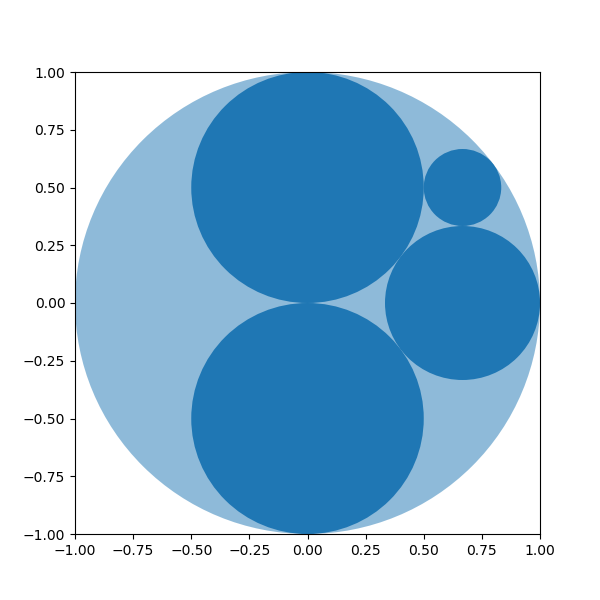

[(462.3553196309574, 1585.2182387347111), 528.406079578237]
[(-239.23031963095747, -820.2182387347113), -273.4060795782371]


In [36]:
fig, ax = plt.subplots(figsize=(6,6))

ax.add_artist(plt.Circle(*circle1, alpha=0.5))
ax.add_artist(plt.Circle(*circle2, alpha=1))
ax.add_artist(plt.Circle(*circle3, alpha=1))
ax.add_artist(plt.Circle(*circ1, alpha=1))
ax.add_artist(plt.Circle(*circ2, alpha=1))

print(circle4[0])
print(circle4[1])

ax.set_ylim((-1,1))
ax.set_xlim((-1,1))


# plt.savefig("temp.png", bbox_inches="tight")


plt.show()

In [38]:
def get_circle(circle1,circle2,circle3):
    A,b = matrix_fun(circle1,circle2,circle3)

    plane1 = np.append(A[0,:], b[0])
    plane2 = np.append(A[1,:], b[1])
    
    (x0,x1), (y0,y1), (z0,z1) = get_line(plane1, plane2)
    
    ai, bi = circle3[0]
    Ri = circle3[1]

    w0 = x0**2 + y0**2 - z0**2
    w1 = 2*(x0*(x1-ai) + y0*(y1-bi) - z0*(z1+Ri))
    w2 = (x1-ai)**2 + (y1-bi)**2 - (z1+Ri)**2

    t = quadratic_eq(w0,w1,w2)
    
    circ1 = circle(*np.array([x0,y0,z0])*t[0]+[x1,y1,z1])
    circ2 = circle(*np.array([x0,y0,z0])*t[1]+[x1,y1,z1])
#     print(circ1[1])
#     print(circ2[1])
#     print(circle1[1])
#     print(circle2[1])
#     print(circle3[1])
    
    circ1_valid =  abs(circ1[1]) < abs(circle1[1]) and abs(circ1[1]) < abs(circle2[1]) and abs(circ1[1]) < abs(circle3[1])
    circ2_valid =  abs(circ2[1]) < abs(circle1[1]) and abs(circ2[1]) < abs(circle2[1]) and abs(circ2[1]) < abs(circle3[1])
    
    if circ1_valid and circ2_valid:
        return [circ1,circ2] # change to return both
    elif circ1_valid:
        return [circ1]
    elif circ2_valid: 
        return [circ2]

In [39]:
get_circle(circle(0, 0, -1), circle(0,.5, .5), circle(0,-.5, .5))

[[(0.6666666666666665, -0.0), 0.3333333333333333],
 [(-0.6666666666666665, 0.0), 0.3333333333333333]]

In [40]:
def circle(x, y, r):
    return ((x,y), r)

In [41]:
# seed_circles
circles = [circle(0, 0, -1), circle(0,.5, .5), circle(0,-.5, .5)]
parents = {3:(0,1,2),4:(0,1,2)}
circ1, circ2 = get_circle(*circles)
circles.append(circ1)
circles.append(circ2)
# print(circles)

c = 5
for i in range(3,7000):  
#     print(parents[i])
    new_circs = list(combinations([*parents[i],i],3))
    new_circs.remove(parents[i])
#     print(new_circs)
    for j,v in enumerate(new_circs):
#         print(v)
        seeds = [circles[v[0]], circles[v[1]], circles[v[2]]]
#         print(i)
#         print(seeds)
        circ = get_circle(*seeds)
#         print(*seeds)
#         print(circ)
        if len(circ)>1:
            
            circles.append(circ[0])
#             print(circ[0])
            parents[c] = tuple(v)
            c+=1
            circles.append(circ[1])
            parents[c] = tuple(v)
            c+=1
            

        else:
#             print(circ)
            circles.append(*circ)
            parents[c] = tuple(v)
            c+=1
        
#         print(circles)
# circles
# parents

In [42]:
_white = (.2,.3,.5)
_black = (.3,.4,.6)

def c_map(t, c0=_black, c1=_white):
    t = abs(t)
    return ((c1[0]-c0[0])*t + c0[0], 
            (c1[1]-c0[1])*t + c0[1], 
            (c1[2]-c0[2])*t + c0[2])       

# print(c_map(1))

<IPython.core.display.Javascript object>


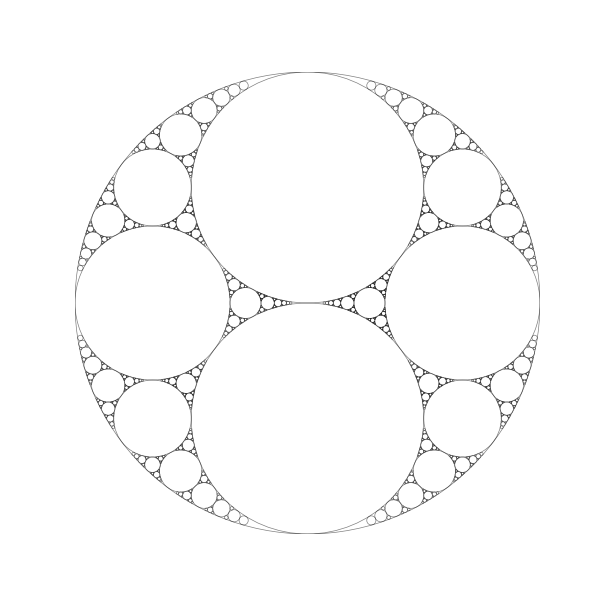

In [45]:
fig, ax = plt.subplots(figsize=(6,6))


for circ in circles[:2000]:
#     print(circ[1])
    ax.add_artist(plt.Circle(*circ, 
                             alpha=0.5, 
                             color='black',
                             fill=False,
                             lw = 0.5))

# print(circle4[0])
# print(circle4[1])

ax.set_xticks([])
ax.set_yticks([])

ax.set_ylim((-1,1))
ax.set_xlim((-1,1))

plt.axis('off')
plt.savefig("circle_fractal.png", bbox_inches="tight",dpi=2000)


# plt.show()

In [684]:
x = np.arange(10)*10

<IPython.core.display.Javascript object>


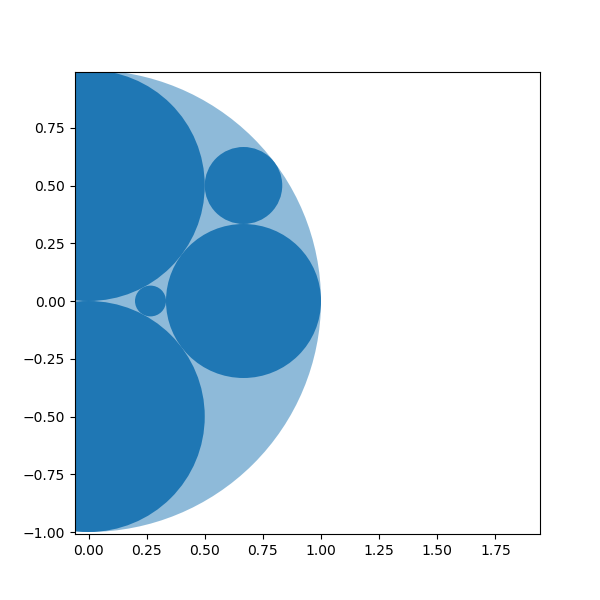

In [614]:
fig, ax = plt.subplots(figsize=(6,6))

circle1 = circle(0,   0, -1)
circle2 = circle(0,  .5, .5)
circle3 = circle(0, -.5, .5)
circle4 = get_circle(circle1, circle2, circle3)
circle5 = get_circle(circle1, circle2, circle4)
circle6 = get_circle(circle2, circle3, circle4)
# print(circle6)
    
ax.add_artist(plt.Circle(*circle1, alpha=0.5))
ax.add_artist(plt.Circle(*circle2, alpha=1))
ax.add_artist(plt.Circle(*circle3, alpha=1))
ax.add_artist(plt.Circle(*circle4, alpha=1))
ax.add_artist(plt.Circle(*circle5, alpha=1))
ax.add_artist(plt.Circle(*circle6, alpha=1))

# print(circle4[0])
# print(circle4[1])

ax.set_ylim((-1,1))
ax.set_xlim((-1,1))


# plt.savefig("temp.png", bbox_inches="tight")


plt.show()